In [1]:
from pathlib import Path
import numpy as np
import os,sys
import pandas as pd
import os
import skseq
from skseq.sequences.extended_feature import ExtendedFeatures
import utils
import skseq.sequences.structured_perceptron as spc

currentdir = Path.cwd()
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir) 



# Structured Perceptron

In [2]:
X_tr, y_tr = utils.gen_set("./data/train_data_ner.csv")
X_test, y_test = utils.gen_set("./data/test_data_ner.csv")
X_tiny, y_tiny = utils.gen_set("./data/tiny_test.csv")

In [3]:
word_dict, tag_dict, rev_dict = utils.dictionary(X_tr, y_tr)

In [4]:
seq = utils.get_seq(word_dict, tag_dict, X_tr, y_tr)

## Base Model

In [5]:
feature_mapper = skseq.sequences.id_feature.IDFeatures(seq)

In [6]:
feature_mapper.build_features()

In [7]:

sp = spc.StructuredPerceptron(word_dict, tag_dict, feature_mapper)
sp.num_epochs = 5
sp.load_model(dir="./fitted_models/sp_base_")

### Train

In [8]:
y_hats = utils.get_predictions(sp, X_tr)

In [9]:
y_tr_ls = np.array([tag_dict[t] for t in np.concatenate(y_tr)])

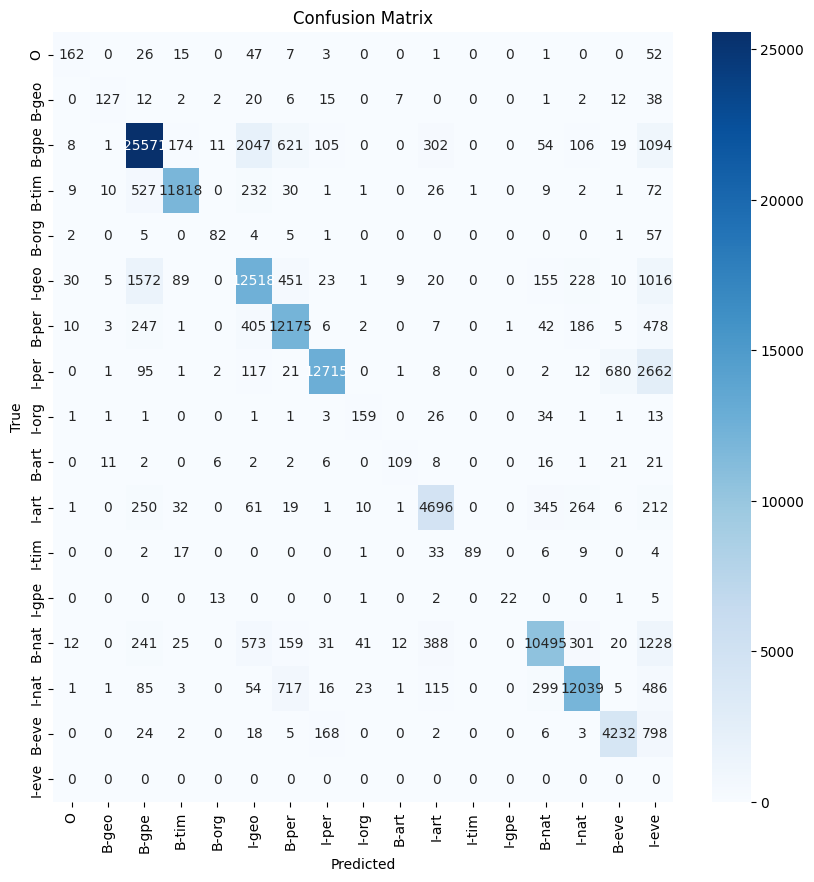

{'accuracy with O': 0.9684081697831473,
 'accuracy': 0.8310862237686202,
 'f1_score': 0.9681914545870688}

In [10]:
utils.evaluate(y_tr_ls, y_hats, rev_dict)

### Test

In [11]:
y_hats = utils.get_predictions(sp, X_test)

In [12]:
y_test_ls = np.array([tag_dict[t] for t in np.concatenate(y_test)])

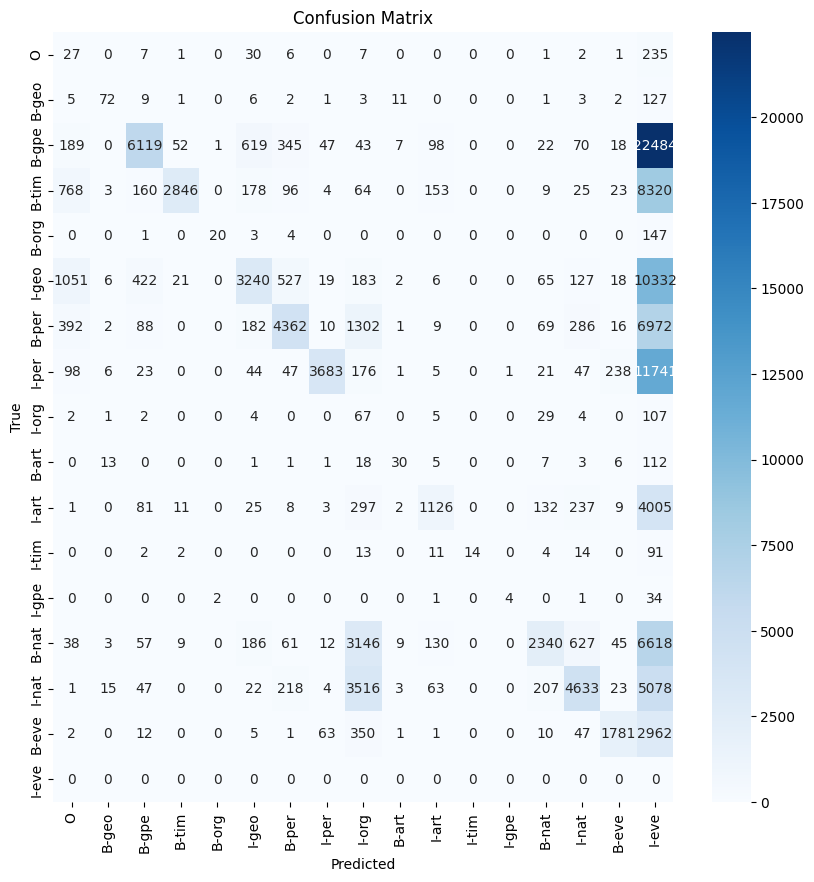

{'accuracy with O': 0.8772335877133269,
 'accuracy': 0.2367877223491613,
 'f1_score': 0.8531773343020015}

In [13]:
utils.evaluate(y_test_ls, y_hats, rev_dict)

### Tiny Test

In [14]:
y_hats = utils.get_predictions(sp, X_tiny)

In [15]:
y_tiny_ls = np.array([tag_dict[t] for t in np.concatenate(y_tiny)])

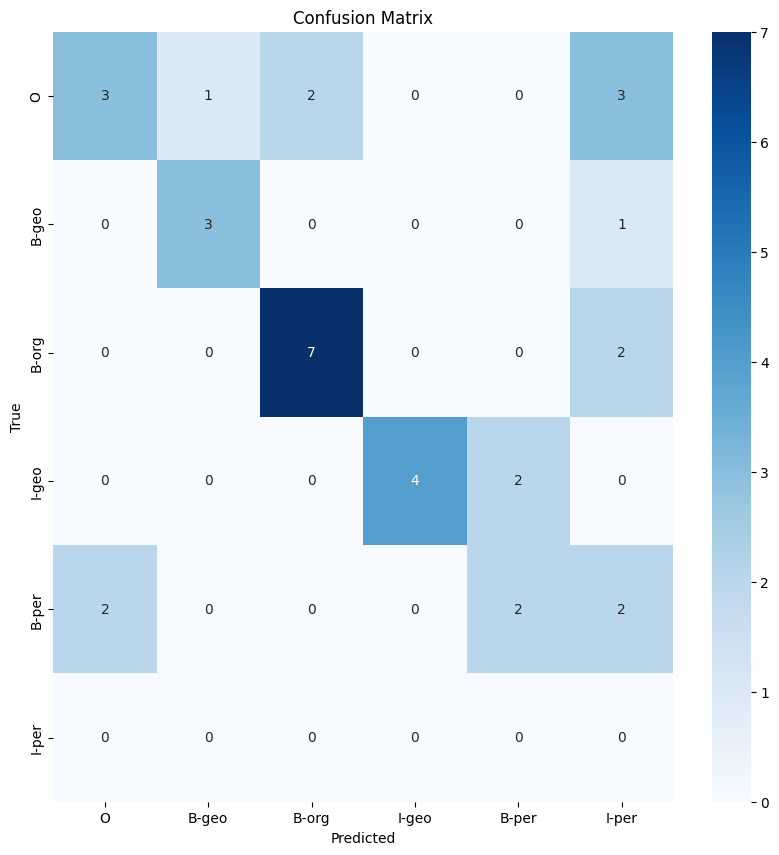

{'accuracy with O': 0.8972602739726028,
 'accuracy': 0.5588235294117647,
 'f1_score': 0.8848977663809974}

In [16]:
utils.evaluate(y_tiny_ls, y_hats, rev_dict)

In [21]:
utils.print_tiny_test(X_tiny, y_hats, rev_dict)

=========TINY TEST=========
The/O programmers/O from/O Barcelona/B-org might/O write/O a/O sentence/O without/O a/O spell/O checker/O ./O 
The/O programmers/O from/O Barchelona/O cannot/O write/O a/O sentence/O without/O a/O spell/O checker/O ./O 
Jack/B-per London/B-geo went/O to/O Parris/O ./O 
Jack/B-per London/B-geo went/O to/O Paris/B-geo ./O 
Bill/B-per gates/O and/O Steve/B-per jobs/O never/O thought/O Microsoft/B-org would/O become/O such/O a/O big/O company/O ./O 
Bill/B-per Gates/I-per and/O Steve/B-per Jobs/I-per never/O thought/O Microsoft/B-org would/O become/O such/O a/O big/O company/O ./O 
The/O president/O of/O U.S.A/O thought/O they/O could/O win/O the/O war/O ./O 
The/O president/O of/O the/O United/B-geo States/I-geo of/I-geo America/I-geo thought/O they/O could/O win/O the/O war/O ./O 
The/O king/O of/O Saudi/B-per Arabia/I-per wanted/O total/O control/O ./O 
Robin/O does/O not/O want/O to/O go/O to/O Saudi/B-per Arabia/I-per ./O 
Apple/O is/O a/O great/O company/O

## Extended Features

In [22]:
feature_mapper_extra = ExtendedFeatures(seq)
feature_mapper_extra.build_features()

In [23]:
sp = spc.StructuredPerceptron(word_dict, tag_dict, feature_mapper_extra)
sp.num_epochs = 5
sp.load_model(dir="./fitted_models/sp_ext_")

### Train

In [24]:
y_hats = utils.get_predictions(sp, X_tr)

In [25]:
y_tr_ls = np.array([tag_dict[t] for t in np.concatenate(y_tr)])

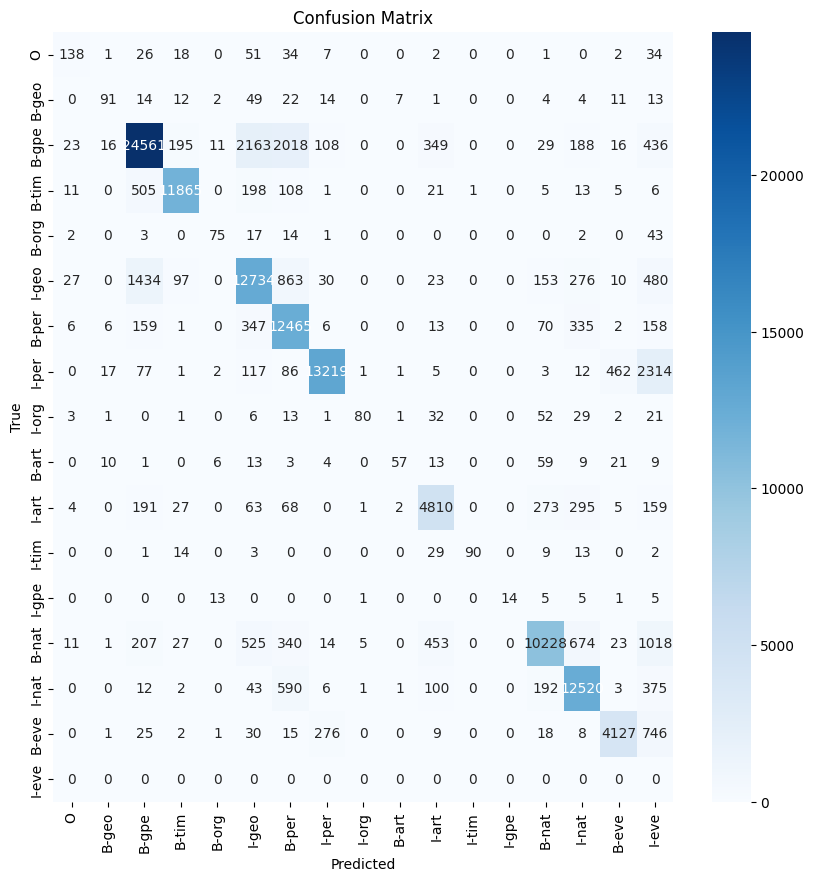

{'accuracy with O': 0.963219530448399,
 'accuracy': 0.8315910467699095,
 'f1_score': 0.9639048305699943}

In [26]:
utils.evaluate(y_tr_ls, y_hats, rev_dict)

### Test

In [27]:
y_hats = utils.get_predictions(sp, X_test)

In [28]:
y_test_ls = np.array([tag_dict[t] for t in np.concatenate(y_test)])

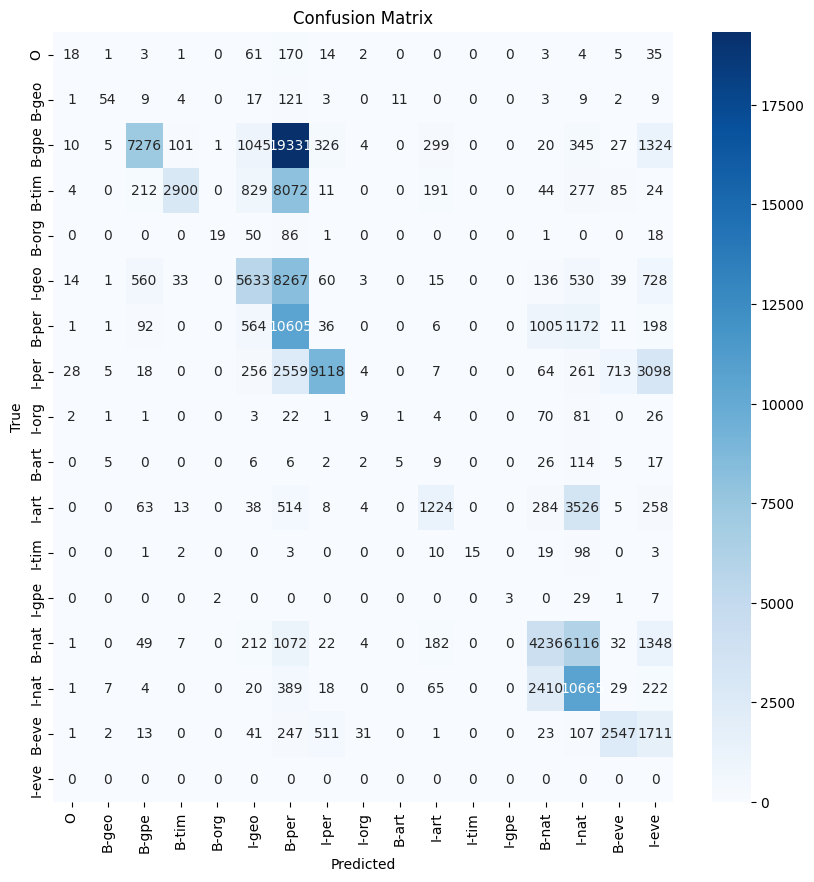

{'accuracy with O': 0.8992929908160462,
 'accuracy': 0.42365849664282984,
 'f1_score': 0.9009099455763558}

In [29]:
utils.evaluate(y_test_ls, y_hats, rev_dict)

### Tiny Test

In [30]:
y_hats = utils.get_predictions(sp, X_tiny)

In [31]:
y_tiny_ls = np.array([tag_dict[t] for t in np.concatenate(y_tiny)])

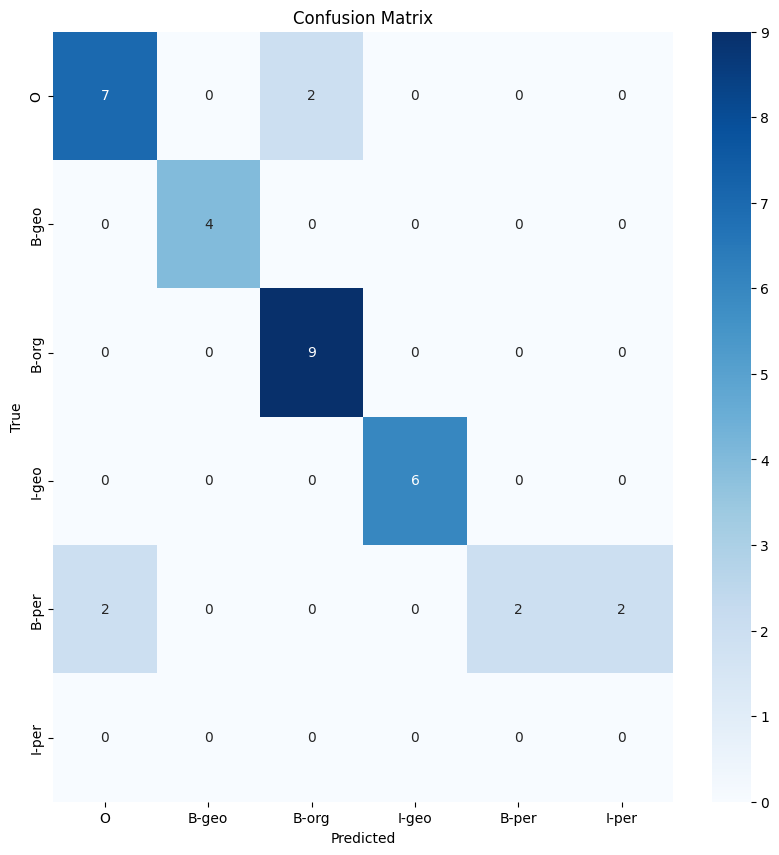

{'accuracy with O': 0.958904109589041,
 'accuracy': 0.8235294117647058,
 'f1_score': 0.952800339435083}

In [32]:
utils.evaluate(y_tiny_ls, y_hats, rev_dict)

In [33]:
utils.print_tiny_test(X_tiny, y_hats, rev_dict)

=========TINY TEST=========
The/O programmers/O from/O Barcelona/B-geo might/O write/O a/O sentence/O without/O a/O spell/O checker/O ./O 
The/O programmers/O from/O Barchelona/B-per cannot/O write/O a/O sentence/O without/O a/O spell/O checker/O ./O 
Jack/B-per London/B-geo went/O to/O Parris/B-per ./O 
Jack/B-per London/B-geo went/O to/O Paris/B-geo ./O 
Bill/B-per gates/O and/O Steve/B-per jobs/O never/O thought/O Microsoft/B-org would/O become/O such/O a/O big/O company/O ./O 
Bill/B-per Gates/I-per and/O Steve/B-per Jobs/I-per never/O thought/O Microsoft/B-org would/O become/O such/O a/O big/O company/O ./O 
The/O president/O of/O U.S.A/B-geo thought/O they/O could/O win/O the/O war/O ./O 
The/O president/O of/O the/O United/B-geo States/I-geo of/I-geo America/I-geo thought/O they/O could/O win/O the/O war/O ./O 
The/O king/O of/O Saudi/B-geo Arabia/I-geo wanted/O total/O control/O ./O 
Robin/B-per does/O not/O want/O to/O go/O to/O Saudi/B-geo Arabia/I-geo ./O 
Apple/B-org is/O a

# Deep Learning